In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import evallm
from automata.fa.dfa import DFA
import tqdm.auto as tqdm

In [3]:
import itertools

In [4]:
from evallm.experiments.transducer_experiment import gather_prompts
from evallm.sample_dfa.sample_dfa import sample_dfa

In [5]:
from evallm.prompting.transducer_prompt import (
    BasicSequencePrompt,
    SequencePromptWithExplanation,
    SequencePromptWithExplanationChainOfThought,
    RedGreenRoomPrompt1,
)

In [6]:
dfas, raw_transducer_results, prompts, expected_answers = gather_prompts(
    prompter_class=BasicSequencePrompt,
    num_states=3,
    num_sequence_symbols=30,
    n_dfas=3,
    n_samples_per_dfa=2,
    is_chat=True,
)

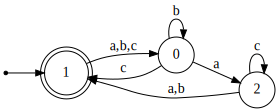

In [7]:
dfas[0]

In [8]:
for inp, out in raw_transducer_results[0]:
    print("*" * 10)
    print("".join(inp))
    print("".join(str(int(x)) for x in out))

**********
caaabcacbccccabcbacbbcacababac
001001010101001000010101000101
**********
bbcaacaabcabaabbcbbbbbcaaaaaac
001000100100010010000010010010


In [9]:
for prompt in prompts[0]:
    print("*" * 10)
    for k in prompt:
        print(k.upper())
        print("*" * 5)
        print(prompt[k])

**********
SYSTEM
*****

USER
*****
You are a sequence completion model. Output the next element of the sequence, and nothing else.

c, 0, a, 0, a, 1, a, 0, b, 0, c, 1, a, 0, c, 1, b, 0, c, 1, c, 0, c, 1, c, 0, a, 0, b, 1, c, 0, b, 0, a, 0, c, 0, b, 1, b, 0, c, 1, a, 0, c, 1, a, 0, b, 0, a, 0, b, 1, a, 0, c, 
**********
SYSTEM
*****

USER
*****
You are a sequence completion model. Output the next element of the sequence, and nothing else.

b, 0, b, 0, c, 1, a, 0, a, 0, c, 0, a, 1, a, 0, b, 0, c, 1, a, 0, b, 0, a, 0, a, 1, b, 0, b, 0, c, 1, b, 0, b, 0, b, 0, b, 0, b, 0, c, 1, a, 0, a, 0, a, 1, a, 0, a, 0, a, 1, c, 


In [10]:
import subprocess, io

In [11]:
code = f"""
import transformers, json
from transformers.models.llama.tokenization_llama_fast import PreTrainedTokenizerFast
tok = PreTrainedTokenizerFast.from_pretrained("meta-llama/Meta-Llama-3-8B")
code = json.loads({json.dumps(prompt["user"])!r})
print(tok.tokenize(code))
"""
print(code)


import transformers, json
from transformers.models.llama.tokenization_llama_fast import PreTrainedTokenizerFast
tok = PreTrainedTokenizerFast.from_pretrained("meta-llama/Meta-Llama-3-8B")
code = json.loads('"You are a sequence completion model. Output the next element of the sequence, and nothing else.\\n\\nb, 0, b, 0, c, 1, a, 0, a, 0, c, 0, a, 1, a, 0, b, 0, c, 1, a, 0, b, 0, a, 0, a, 1, b, 0, b, 0, c, 1, b, 0, b, 0, b, 0, b, 0, b, 0, c, 1, a, 0, a, 0, a, 1, a, 0, a, 0, a, 1, c, "')
print(tok.tokenize(code))

